### ECE 475 Freq Machine Learning Logistic Regression

Jing Jiang

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline

iris = datasets.load_iris()

X = iris.data[:,:2].astype(np.float32)
Y2 = iris.target
Y = []
for i in Y2:
    if i== 0:
        Y.append(1)
    else:
        Y.append(0)

x_train, x_tmp, y_train, y_tmp = train_test_split(X,Y, test_size= 0.2)
x_test, x_val, y_test, y_val = train_test_split(x_tmp, y_tmp, test_size=0.5)

In [4]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_unreg(features, target, num_steps, learning_rate, add_intercept = False):
    likeli = []
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        gradient = np.dot(features.T, (target - predictions))
        weights += learning_rate * gradient
        likeli.append(log_likelihood(features, target, weights))
        
        
    return weights, likeli

def logistic_l2(features, target, num_steps, learning_rate, lambd, add_intercept = False):
    likeli = []
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        gradient = np.dot(features.T, (target - predictions))
        weights = weights + learning_rate * gradient - lambd * weights
        
        likeli.append(log_likelihood(features, target, weights))
        
        
    return weights, likeli

In [5]:
def logistic(features, target, learning_rate, lambd):    
    w = np.random.normal(0, 1, len(x_train[0]))
    h = lambda w,x: 1/(1+ np.exp(-(np.transpose(w) @ x)))

    for x,y in zip(features, target):
        w = w + learning_rate * np.subtract(y, h(w,x)) * x - lambd * w

    return w

def cross_val(x_train, y_train, x_val, y_val, step):
    max_acc = -sys.maxsize
    lambd = 0
    for i in np.linspace(0.05, 5, 500):
        
        cur_weights = logistic(x_train, y_train, step, i)
        try:
            cur_acc = accuracy(x_val, y_val, cur_weights)
        except:
            continue
            
        if (max_acc < cur_acc):
            max_acc = cur_acc
            lambd = i
            
    return lambd

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


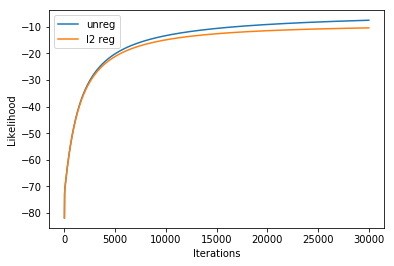

In [21]:
weights, likeli = logistic_unreg(x_train, y_train,
                     num_steps = 30000, learning_rate = 5e-5, add_intercept=True)

lambd = cross_val(x_train, y_train, x_val, y_val, 5e-5)
weights2, likeli2 = logistic_l2(x_train, y_train,
                     num_steps = 30000, learning_rate = 5e-5, lambd = lambd, add_intercept=True)

plt.plot(range(len(likeli)), likeli, label='unreg')
plt.plot(range(len(likeli2)), likeli2, label='l2 reg')

plt.xlabel('Iterations')
plt.ylabel('Likelihood')

plt.legend()
plt.show()

In [19]:
data_with_intercept = np.hstack((np.ones((x_test.shape[0], 1)),x_test))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

data_with_intercept2 = np.hstack((np.ones((x_test.shape[0], 1)),x_test))
final_scores2 = np.dot(data_with_intercept2, weights2)
preds2 = np.round(sigmoid(final_scores2))

print ('Accuracy unreg: {0}'.format((preds == y_test).sum().astype(float) / len(preds)))
print ('Accuracy l2-reg: {0}'.format((preds2 == y_test).sum().astype(float) / len(preds2)))

Accuracy unreg: 0.9933333333333333
Accuracy l2-reg: 0.7933333333333333
